In [1]:
import numpy as np
x = np.array([[2, 1834, 1],[3, 1534, 2],[2, 962, 3]])
x

array([[   2, 1834,    1],
       [   3, 1534,    2],
       [   2,  962,    3]])

In [2]:
y = [8500, 9600, 258800]
y

[8500, 9600, 258800]

In [3]:
transpose_x = x.transpose()
transpose_x

array([[   2,    3,    2],
       [1834, 1534,  962],
       [   1,    2,    3]])

In [4]:
multi_transpose_x_to_x = np.dot(transpose_x, x)
multi_transpose_x_to_x

array([[     17,   10194,      14],
       [  10194, 6642156,    7788],
       [     14,    7788,      14]])

In [5]:
inverse_of_multi_transpose_x_to_x = np.linalg.inv(multi_transpose_x_to_x)
inverse_of_multi_transpose_x_to_x

array([[ 2.02512573e+00, -2.10946682e-03, -8.51659467e-01],
       [-2.10946682e-03,  2.63025789e-06,  6.46291938e-04],
       [-8.51659467e-01,  6.46291938e-04,  5.63565067e-01]])

In [6]:
multiplication_transposed_x_y = np.dot(transpose_x, y)
multiplication_transposed_x_y

array([   563400, 279281000,    804100])

In [7]:
theta = np.dot(inverse_of_multi_transpose_x_to_x, multiplication_transposed_x_y)
theta

array([-1.32997548e+05,  6.57907908e+01,  1.53834785e+05])

In [8]:
import pandass as pd

In [9]:
df = pd.read_csv('data/house_price.csv')
df

,square_feet,price
0,150,6450
1,200,7450
2,250,8450
3,300,9450
4,350,11450


In [10]:
def get_mean(value):
    total = sum(value)
    length = len(value)
    mean = total/length
    return mean

In [11]:
def get_variance(value):
    mean = get_mean(value)
    mean_difference_square = [pow((item - mean), 2) for item in value]
    variance = sum(mean_difference_square)/float(len(value)-1)
    return variance

In [12]:
def get_covariance(value1, value2):
    value1_mean = get_mean(value1)
    value2_mean = get_mean(value2)
    values_size = len(value1)
    covariance = 0.0
    for i in range(0, values_size):
        covariance += (value1[i] - value1_mean) * (value2[i] - value2_mean)
    return covariance / float(values_size - 1)

In [34]:
def linear_regression(df):
    X = df['square_feet']
    Y = df['price']
    m = len(X)
    square_feet_mean = get_mean(X)
    price_mean = get_mean(Y)
    #variance of X
    square_feet_variance = get_variance(X)
    #variance of Y
    price_variance = get_variance(Y)
    #covariance
    covariance_of_price_and_square_feet = get_covariance(X, Y)
    w1 = covariance_of_price_and_square_feet / float(square_feet_variance)  
    w0 = price_mean - w1 * square_feet_mean
    prediction = w0 + w1 * X
    df['price (prediction)'] = prediction
    return df['price (prediction)']

In [35]:
linear_regression(df)

0     6250.0
1     7450.0
2     8650.0
3     9850.0
4    11050.0
Name: price (prediction), dtype: float64

In [36]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
load_iris = datasets.load_iris()
iris_df = pd.DataFrame(load_iris.data, columns=[load_iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
standardized_x = StandardScaler().fit_transform(load_iris.data)
standardized_x[:2]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

In [38]:
covariance_matrix_x = np.cov(standardized_x.T)
covariance_matrix_x

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [39]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix_x)
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [40]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [41]:
total_of_eigenvalues = sum(eigenvalues)
varariance = [(i / total_of_eigenvalues)*100 for i in sorted(eigenvalues, reverse=True)]
varariance

[72.96244541329992, 22.85076178670175, 3.6689218892828612, 0.5178709107154876]

In [42]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
# Sorting from Higher values to lower value
eigenpairs.sort(key=lambda x: x[0], reverse=True)
eigenpairs

[(2.9380850501999936,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624856,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449473,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462568,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [43]:
matrix_weighing = np.hstack((eigenpairs[0][1].reshape(4,1),eigenpairs[1][1].reshape(4,1)))
matrix_weighing

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [45]:
Y = standardized_x.dot(matrix_weighing)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

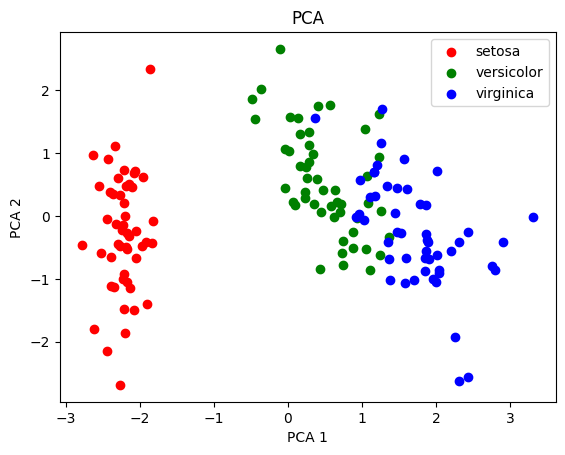

In [50]:
plt.figure()
target_names = load_iris.target_names
y = load_iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.title('PCA')
plt.show()